In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Price')

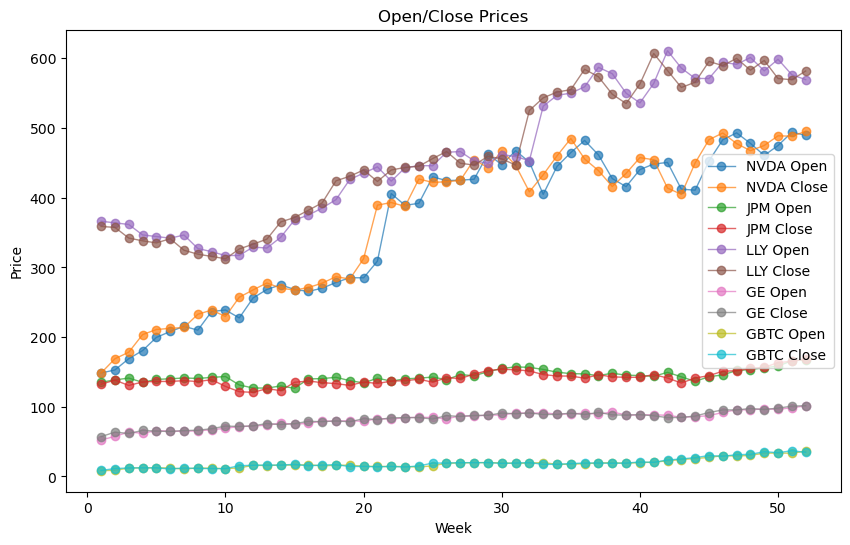

In [3]:
open_close = pd.read_csv('data/open_close.csv')

columns = ['NVDA Open', 'NVDA Close', 'JPM Open', 'JPM Close', 'LLY Open', 'LLY Close',
           'GE Open', 'GE Close', 'GBTC Open', 'GBTC Close']

open_close.drop(0, inplace=True)
open_close = open_close.astype(float)
open_close.columns = columns

open_close.plot(style='-o', linewidth=1, alpha=0.7, figsize=(10, 6))
plt.title('Open/Close Prices')
plt.xlabel('Week')
plt.ylabel('Price')

Text(0, 0.5, 'Return')

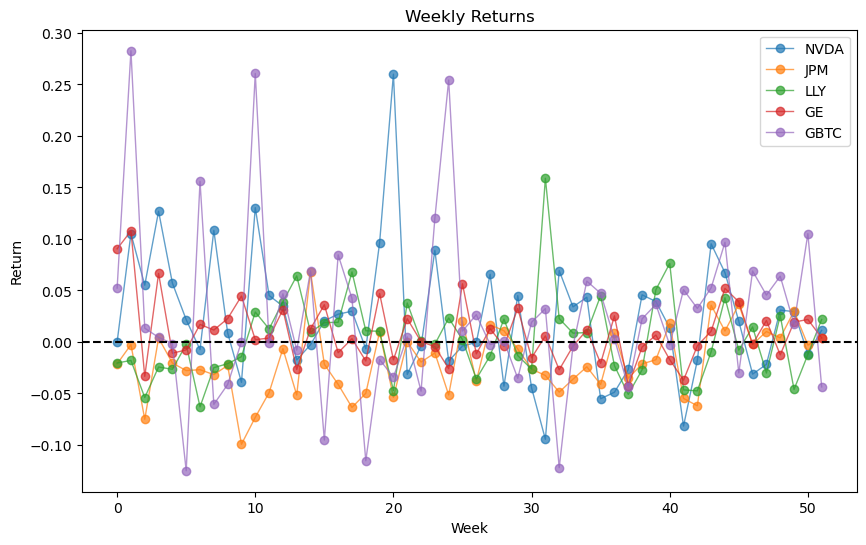

In [4]:
weekly_returns = pd.read_csv('data/weekly_returns.csv')

weekly_returns.plot(style='-o', linewidth=1, alpha=0.7, figsize=(10, 6))
plt.axhline(y=0, color='k', linestyle='--') 
plt.title('Weekly Returns')
plt.xlabel('Week')
plt.ylabel('Return')

In [5]:
mu_vec = pd.read_csv('data/mu_vec.csv', index_col=0)
covariance_mtx = pd.read_csv('data/covariance_mtx.csv', index_col=0)

mu_vec, covariance_mtx

(             0
 NVDA  0.023389
 JPM  -0.018947
 LLY   0.002577
 GE    0.009198
 GBTC  0.025939,
           NVDA       JPM       LLY        GE      GBTC
 NVDA  0.003706  0.000040 -0.000509  0.000338  0.000289
 JPM   0.000040  0.001054  0.000035  0.000385 -0.000017
 LLY  -0.000509  0.000035  0.001574 -0.000061  0.000119
 GE    0.000338  0.000385 -0.000061  0.000931  0.000537
 GBTC  0.000289 -0.000017  0.000119  0.000537  0.006881)

Text(0.5, 0, 'Stock')

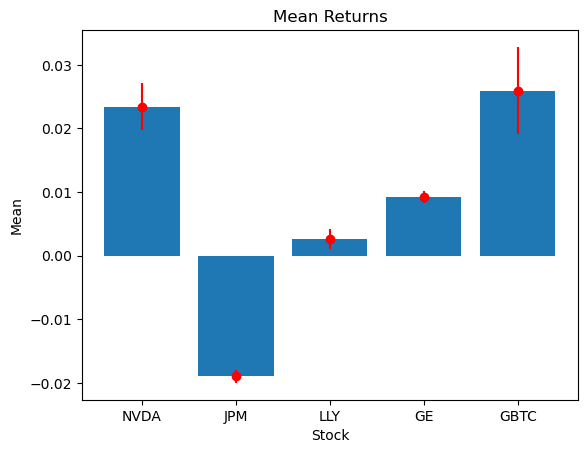

In [6]:
plt.bar(mu_vec.index, mu_vec.values.flatten())
plt.errorbar(mu_vec.index, mu_vec.values.flatten(), yerr=np.diagonal(covariance_mtx), fmt="o", color="r")
plt.title('Mean Returns')
plt.ylabel('Mean')
plt.xlabel('Stock')

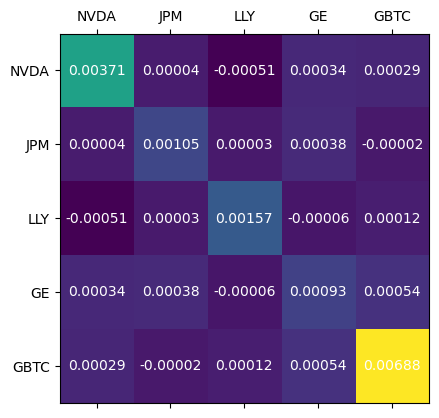

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.matshow(covariance_mtx)

for (i, j), val in np.ndenumerate(covariance_mtx):
    ax.text(j, i, f'{val:.5f}', ha='center', va='center', color='w')

labels = list(covariance_mtx.columns)
x_ticks = list(range(len(labels)))
ax.set_xticks(x_ticks)
ax.set_yticks(x_ticks)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

In [8]:
np.linalg.eig(covariance_mtx)

(array([0.0069607 , 0.00383117, 0.0005574 , 0.00146353, 0.00133345]),
 array([[-0.09578203, -0.96354954, -0.06356401,  0.1941016 ,  0.14381337],
        [-0.00397751, -0.02576697, -0.60903058,  0.23224832, -0.75793318],
        [-0.01179871,  0.22471498,  0.04367694,  0.94179734,  0.24591476],
        [-0.09381021, -0.10183326,  0.78659061,  0.13948832, -0.58536129],
        [-0.99089375,  0.10020738, -0.0663995 , -0.04411435,  0.04163043]]))

Text(0, 0.5, 'Price')

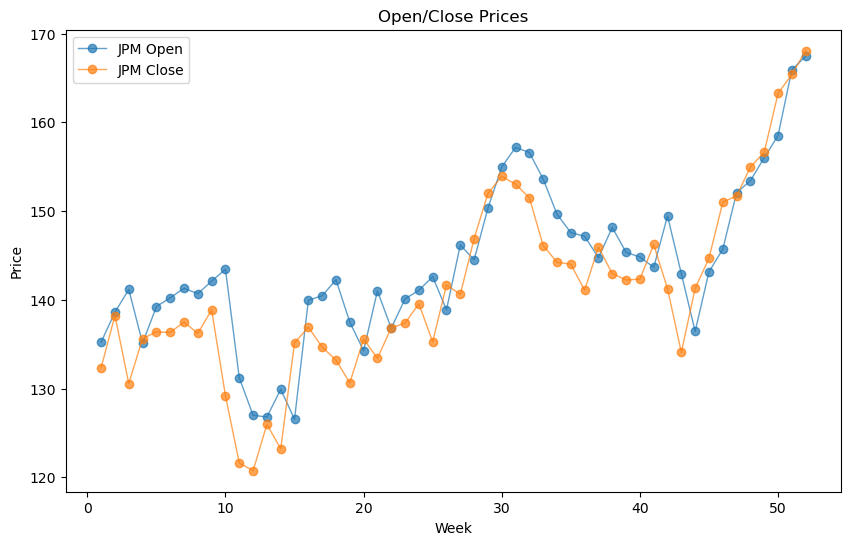

In [9]:
open_close = pd.read_csv('data/open_close.csv')

columns = ['NVDA Open', 'NVDA Close', 'JPM Open', 'JPM Close', 'LLY Open', 'LLY Close',
           'GE Open', 'GE Close', 'GBTC Open', 'GBTC Close']

open_close.drop(0, inplace=True)
open_close = open_close.astype(float)
open_close.columns = columns
open_close = open_close[['JPM Open', 'JPM Close']]

open_close.plot(style='-o', linewidth=1, alpha=0.7, figsize=(10, 6))
plt.title('Open/Close Prices')
plt.xlabel('Week')
plt.ylabel('Price')